#Question
#find SVD for the matrix

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# <font face="gotham" color="purple"> The Singular Values </font>

We have discussed what _Spectral Decomposition_ which can decompose any symmetric matrices unconditionally into three special matrices.However only square matrices have eigenvalues and vectors, however we want to extend a similar concept for any $m \times n$ matrices.

If $A$ is an $m \times n$ matrix, then $A^TA$ and $AA^T$ are both symmetric and orthogonally diagonalizable.

In [ ]:
A = np.array([[4, 1],
              [1,  0],
              [3,  2],
              [2,  4],
              [-1, 0]])

Compute eigenvalues and eigenvectors of $A^TA$.

In [ ]:
ATA = A.T@A; ATA

array([[31, 18],
       [18, 21]])

In [ ]:
D1, P1 = np.linalg.eig(ATA)

Check if $P$ is an orthonormal matrix.

In [ ]:
P1@P1.T

array([[1., 0.],
       [0., 1.]])

In [ ]:
D1

array([43.541,  0.459])

The square roots of eigenvalues of $A^TA$ are called _singular values_  of $A$, denoted by $\sigma_1, ..., \sigma_n$ in decreasing order.

We can also show that singular values of $A$ are the lengths of vectors $A\mathbf{v}_1,..., A\mathbf{v}_n$, where $\mathbf{v}_i$ is the eigenvalue of $A^TA$.

The length of $A\mathbf{v}_i$ is $\|A\mathbf{v}_i\|$

$$
\|A\mathbf{v}_i\| = \sqrt{(A\mathbf{v}_i)^TA\mathbf{v}_i} = \sqrt{\mathbf{v}_i^TA^T A\mathbf{v}_i}=\sqrt{\mathbf{v}_i^T(\lambda_i\mathbf{v}_i)} = \sqrt{\lambda_i}=\sigma_1
$$

where $\sqrt{\mathbf{v}_i^T\mathbf{v}_i} = 1$ and $\lambda_i$'s are eigenvalues of $A^TA$.

 # <font face="gotham" color="purple"> Singular Value Decomposition</font>

**Singular Value Decomposition** (SVD) is probably the most important decomposition technique in the history of linear algebra, it combines all the theory we discussed, then culminate at this point.

$A$ is a $m\times n$ matrix. However $AA^T$ and $A^TA$ are symmetric matrices,then both are orthogonally diagonalizable.

$$
AA^T = U\Sigma\Sigma^T U^T=(U\Sigma V^T)(V\Sigma U^T)\\
A^TA = V\Sigma^T \Sigma V^T = (V\Sigma^T U^T)(U \Sigma V^T)
$$

where $\Sigma\Sigma^T$ is a diagonal matrix with all eigenvalues of $AA^T$ and $\Sigma^T \Sigma$ is a diagonal matrix with all eigenvalues of $VV^T$.

Because both $AA^T$ and $A^TA$ are symmetric, then $UU^T= U^TU=I_{m\times m}$ and $VV^T= V^TV=I_{n\times n}$.

We have implicitly shown the singular value decompositions above, one of the most important concept in linear algebra.

$$
\Large
SVD:\quad
A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}
$$

The SVD theory guarantees that any matrix $A$, no matter its ranks or shapes, can be unconditionally decomposed into three special matrices.

So next question: what is $\Sigma$?

It is an $m\times n$ main diagonal matrix, with all singular values on the main diagonal. Rewrite

$$
A^TA = V\Sigma^T \Sigma V^T = V\Sigma^2 V^T
$$

Post-multiply both sides by $V$

$$
A^TAV = V\Sigma^2
$$

This is the matrix version of $A\mathbf{v}_i = \lambda_i \mathbf{v}_i$, but here the matrix of interest is $A^TA$ rather than $A$. Similarly it can be written with singular values

$$
A^TA\mathbf{v}_i = \sigma_i^2\mathbf{v}_i
$$

Because $U$ and $V$ are not unique, we tend to standardize the solution by arranging $\sigma_1 \geq \sigma_2 \geq \sigma_3\geq ... \geq\sigma_r$.

Why we only arrange $r$ singular values? Because it is the rank of $A$, so is the rank of $A^TA$. Explicitly $\Sigma$ looks like


$$\Sigma =\left[\begin{array}{cccccc}
\sqrt{\lambda_{1}} & & & & &\\
& \sqrt{\lambda_{2}} & & & &\\
& & \ddots & & &\\
& & & \sqrt{\lambda}_{\mathrm{r}} & &\\
& & & & \ddots &\\
& & & & & 0
\end{array}\right]
=\left[\begin{array}{cccccc}
\sigma_1 & & & & &\\
& \sigma_2 & & & &\\
& & \ddots & & &\\
& & & \sigma_r & &\\
& & & & \ddots &\\
& & & & & 0
\end{array}\right]
$$

We can do the same for $AA^T$ and get

$$
AA^TU = U \Sigma^2
$$

or

$$
AA^T\mathbf{u}_i = \sigma_i^2\mathbf{u}_i
$$

We have shown why $A_{m\times n} = U_{m\times m}\Sigma_{m \times n} V^T_{n \times n}$ holds.

To perfomr a SVD on $A$, we just need two equations and this is also a mannual procedure to decompose any matrix.

$$
A^TA = V\Sigma^T \Sigma V^T\\
AV = U\Sigma
$$

Here's an example, let's say we have we have a data set $A$

Give it a $\text{SVD}$ decomposition

Let's say we want to reduce $A_{10\times 3}$ in to $A_{10\times 2}$.

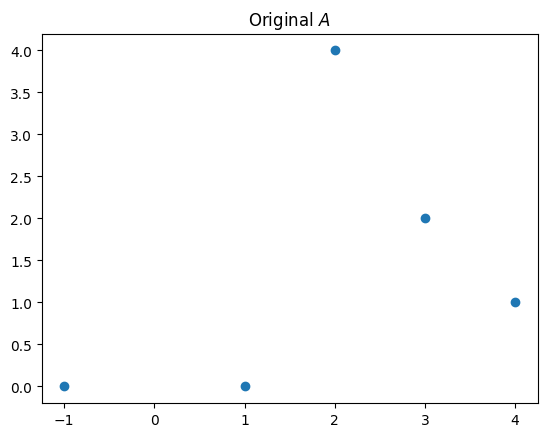

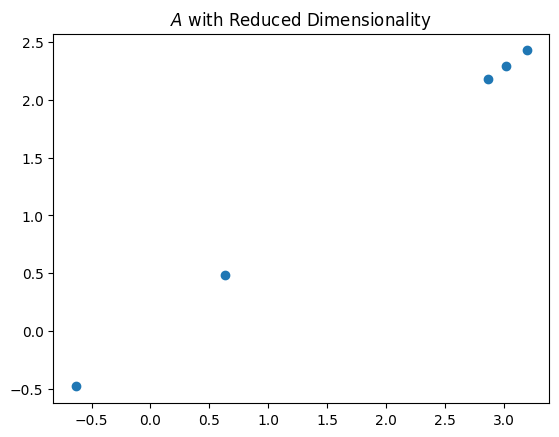

In [5]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[4, 1],
              [1,  0],
              [3,  2],
              [2,  4],
              [-1, 0]])
U, S, VT = np.linalg.svd(A)
A_reduced = np.dot(U[:, :1], np.dot(np.diag(S[:1]), VT[:1, :]))

# Plot original data
plt.scatter(A[:, 0], A[:, 1])
plt.title("Original $A$")
plt.show()

# Plot reduced data
plt.scatter(A_reduced[:, 0], A_reduced[:, 1])
plt.title("$A$ with Reduced Dimensionality")
plt.show()

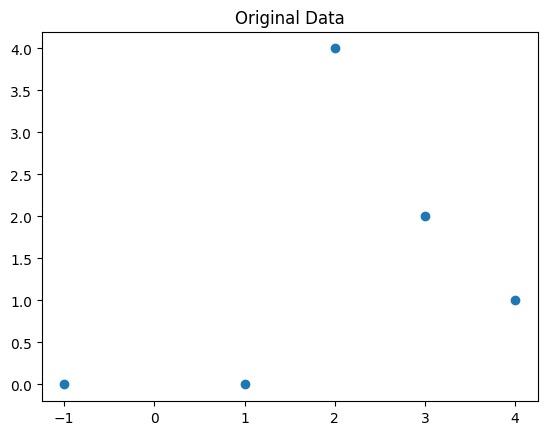

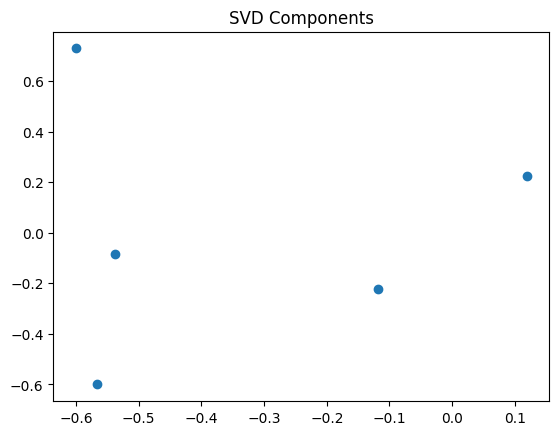

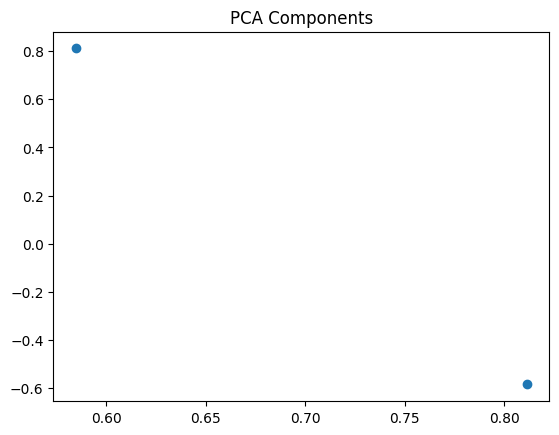

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
data = np.array([[4, 1],
              [1,  0],
              [3,  2],
              [2,  4],
              [-1, 0]])

# Perform SVD on the data
U, s, VT = np.linalg.svd(data)

# Perform PCA on the data
mean = np.mean(data, axis=0)
data_pca = data - mean
cov = np.cov(data_pca.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.title("Original Data")
plt.show()

# Plot the SVD components
plt.scatter(U[:, 0], U[:, 1])
plt.title("SVD Components")
plt.show()

# Plot the PCA components
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1])
plt.title("PCA Components")
plt.show()


## <font face="gotham" color="purple"> Reformulate SVD</font>

Rewrite $SVD$

$$
AV = U\Sigma
$$

vector version is

$$
A\mathbf{v}_i = \sigma_i \mathbf{u}_i
$$

There two implications from the equation above: $(a)$ $A$ can be decomposed into

$$
A = \sum_{i}^r\sigma_i\mathbf{u}_i \mathbf{v}_i^T
$$

$(b)$ We can compute $\mathbf{u}_i$ by using

$$\mathbf{u}_i = \frac{A\mathbf{v}_i}{\sigma_i}$$